In [1]:
import networkx as nx
import axelrod as axl
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import random
%matplotlib inline
from networkx.drawing.nx_agraph import graphviz_layout
import statsmodels.formula.api as sm

In [3]:
players = [axl.TitForTat(), axl.CycleHunter(), axl.Random(), #AlternatorHunter
           axl.DefectorHunter(), axl.Cooperator(), 
           axl.Grudger(), axl.TrickyDefector(), axl.Aggravater(), 
           axl.Random(), axl.Defector()]

In [4]:
edges = [(0, 9), (0, 1), (0, 2), (0, 3), (0, 4), (9, 5), (9, 6), (9, 7), (9, 8),
         (1, 2), (2, 3), (3, 4), (1, 3), (1, 4 ), (2, 4),
         (5, 6), (6, 7), (7, 8), (5, 7), (5, 8), (6, 8)]

In [5]:
G = nx.Graph()

In [6]:
for i in range(len(players)) : G.add_node(i)

In [7]:
G.add_edges_from(edges)

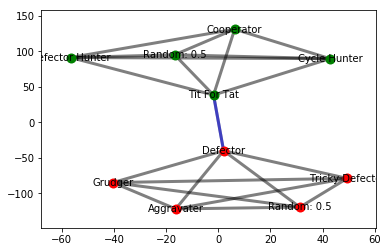

In [8]:
pos = graphviz_layout(G)
# for the nodes 
nx.draw_networkx_nodes(G,pos,
                       nodelist=[0, 1, 2, 3, 4],
                       node_color='g',
                       node_size=100,
                       )
nx.draw_networkx_nodes(G,pos,
                       nodelist=[5, 6, 7, 8, 9],
                       node_color='r',
                       node_size=100,
                       )
# for the edges
nx.draw_networkx_edges(G,pos,
                       alpha = 0.5,
                       width=3)
nx.draw_networkx_edges(G,pos,
                       edgelist = [(0, 9)],
                       alpha = 0.5, edge_color='b',
                       width=3)
                       
# using labels
labels={}
for i in range(len(players)):
    labels[i]= '%s' % (players[i])
nx.draw_networkx_labels(G,pos,labels,font_size=10)
plt.show()

In [9]:
def Neighborhood(G):
    Neighborhood = []
    for i in range(len(players)) : Neighborhood.append(G.neighbors(i))
    return Neighborhood

In [10]:
def Neighborhood_size (Neighborhood) :
    Neighborhood_size = []
    for i in range(len(Neighborhood)) : Neighborhood_size.append(len(Neighborhood[i]))
    return Neighborhood_size

In [11]:
def NeighborsScores(G, results):
    return [[results.scores[j] for j in G.neighbors(i)]
            for i, pl in enumerate(players)]

In [66]:
def AvNeighborsScore(G, results) :
    av_score = []
    temp = [[j for m in G.neighbors(k) for j in results.scores[m]]
              for k in G.nodes()]
    for i in G.nodes() :
        av_score.append(np.mean(temp[i]))
    return av_score

In [73]:
def run_spatial_tournament(G, seed):
    """Run out highschool example
    """
    random.seed(seed)
    np.random.seed(seed)
    edges = G.edges()
    tournament = axl.SpatialTournament(players, edges=G.edges(), repetitions=5) 
    return tournament.play(processes=0, filename="Data/Binomial/Interactions/highschool-NA-{}.csv".format(seed))

In [78]:
def highschool_tournament(G, seed, p):
    results = run_spatial_tournament(G, seed)
    neighborhood = Neighborhood(G)
    nsize = Neighborhood_size(neighborhood)
    Degree = list(G.degree(G.nodes()).values())
    nscores = NeighborsScores(G, results)
    av_nscores = AvNeighborsScore(G, results)
    
    data = pd.DataFrame({'seed' : i, 'Parameter': p ,'PlayersIndex' : G.nodes(),
                         'PlayersName' : results.players, 'Degree' : Degree ,
                         'Neighborhood' : neighborhood, 'NeighborhoodSize' : nsize,
                         'Ranking' : results.ranking, 'Scores' : results.scores,
                         'NormalisedScores' : results.normalised_scores,
                         'AverageScore' : [np.median(scores) for scores in results.normalised_scores],
                         'NeighborsScore' : nscores, 'AverageNeighborsScore' : av_nscores,
                         #'Payoffs' : tournament.game.RPST(),
                         'Connectivity' : nx.node_connectivity(G), 
                         'Clustering' : nx.average_clustering(G)

                        })
    return data

In [79]:
results = pd.DataFrame()
for seed in range(0, 1):
    p = seed/100
    results = results.append([highschool_tournament(G,seed,p)])

results.to_csv("/home/nikoleta/Desktop/Highschool.csv", index=False) 

In [70]:
results

,AverageNeighborsScore,AverageScore,Clustering,Connectivity,Degree,Neighborhood,NeighborhoodSize,NeighborsScore,NormalisedScores,Parameter,PlayersIndex,PlayersName,Ranking,Scores,seed
0,2111.312727,2.44600,0.92,1,5,"[9, 2, 3, 4, 1]",5,"[[1400, 1408, 1388, 1388, 1376, 1452, 1444, 13...","[2.434, 2.454, 2.445, 2.42, 2.443, 2.436, 2.45...",0.0,0,Tit For Tat,2,"[2434, 2454, 2445, 2420, 2443, 2436, 2459, 246...",0
1,2372.936364,2.63250,0.92,1,4,"[0, 2, 3, 4]",4,"[[2434, 2454, 2445, 2420, 2443, 2436, 2459, 24...","[2.64375, 2.6025, 2.63625, 2.61375, 2.5625, 2....",0.0,1,Cycle Hunter,1,"[2115, 2082, 2109, 2091, 2050, 2073, 2091, 210...",0
2,2186.618182,3.56125,0.92,1,4,"[0, 1, 3, 4]",4,"[[2434, 2454, 2445, 2420, 2443, 2436, 2459, 24...","[3.55875, 3.57, 3.58125, 3.54875, 3.6275, 3.58...",0.0,2,Random: 0.5,4,"[2847, 2856, 2865, 2839, 2902, 2864, 2858, 287...",0
3,2373.936364,2.62500,0.92,1,4,"[0, 1, 2, 4]",4,"[[2434, 2454, 2445, 2420, 2443, 2436, 2459, 24...","[2.6025, 2.63875, 2.6025, 2.5975, 2.62875, 2.6...",0.0,3,Defector Hunter,3,"[2082, 2111, 2082, 2078, 2103, 2088, 2103, 213...",0
4,2373.440909,2.62875,0.92,1,4,"[0, 1, 2, 3]",4,"[[2434, 2454, 2445, 2420, 2443, 2436, 2459, 24...","[2.60625, 2.61, 2.61, 2.63625, 2.56875, 2.6325...",0.0,4,Cooperator,5,"[2085, 2088, 2088, 2109, 2055, 2106, 2109, 205...",0
5,1019.195455,2.47500,0.92,1,4,"[8, 9, 6, 7]",4,"[[470, 479, 470, 532, 523, 474, 505, 483, 542,...","[2.48, 2.465, 2.43, 2.45, 2.4775, 2.5375, 2.52...",0.0,5,Grudger,0,"[1984, 1972, 1944, 1960, 1982, 2030, 2016, 197...",0
6,1272.063636,1.21000,0.92,1,4,"[8, 9, 5, 7]",4,"[[470, 479, 470, 532, 523, 474, 505, 483, 542,...","[1.23875, 1.2125, 1.2725, 1.1625, 1.1675, 1.18...",0.0,6,Tricky Defector,7,"[991, 970, 1018, 930, 934, 951, 930, 1020, 894...",0
7,1213.095455,1.50500,0.92,1,4,"[8, 9, 5, 6]",4,"[[470, 479, 470, 532, 523, 474, 505, 483, 542,...","[1.495, 1.525, 1.46375, 1.425, 1.55875, 1.54, ...",0.0,7,Aggravater,9,"[1196, 1220, 1171, 1140, 1247, 1232, 1196, 122...",0
8,1389.477273,0.61375,0.92,1,4,"[9, 5, 6, 7]",4,"[[1400, 1408, 1388, 1388, 1376, 1452, 1444, 13...","[0.5875, 0.59875, 0.5875, 0.665, 0.65375, 0.59...",0.0,8,Random: 0.5,6,"[470, 479, 470, 532, 523, 474, 505, 483, 542, ...",0
9,1418.640000,1.41200,0.92,1,5,"[0, 8, 5, 6, 7]",5,"[[2434, 2454, 2445, 2420, 2443, 2436, 2459, 24...","[1.4, 1.408, 1.388, 1.388, 1.376, 1.452, 1.444...",0.0,9,Defector,8,"[1400, 1408, 1388, 1388, 1376, 1452, 1444, 139...",0


In [71]:
results.corr(method='pearson')

,AverageNeighborsScore,AverageScore,Clustering,Connectivity,Degree,NeighborhoodSize,Parameter,PlayersIndex,Ranking,seed
AverageNeighborsScore,1.000000,0.674401,NaN,NaN,-0.007687,-0.007687,NaN,-0.748686,-0.393350,NaN
AverageScore,0.674401,1.000000,NaN,NaN,-0.108246,-0.108246,NaN,-0.789613,-0.630156,NaN
Clustering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Connectivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Degree,-0.007687,-0.108246,NaN,NaN,1.000000,1.000000,NaN,0.000000,0.087039,NaN
NeighborhoodSize,-0.007687,-0.108246,NaN,NaN,1.000000,1.000000,NaN,0.000000,0.087039,NaN
Parameter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PlayersIndex,-0.748686,-0.789613,NaN,NaN,0.000000,0.000000,NaN,1.000000,0.733333,NaN
Ranking,-0.393350,-0.630156,NaN,NaN,0.087039,0.087039,NaN,0.733333,1.000000,NaN
seed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
pd.crosstab(results.PlayersIndex, results.Ranking)

Ranking,0,1,2,3,4,5,6,7,8,9
PlayersIndex,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,1,0,0,0


In [123]:
regression = sm.ols(formula=" AverageScore ~ Degree ", data=results).fit()

In [124]:
regression.params

Intercept    7.742156
Degree      -1.222531
dtype: float64

In [125]:
regression.summary()

/home/nikoleta/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AverageScore   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     1.265
Date:                Fri, 15 Jul 2016   Prob (F-statistic):              0.293
Time:                        15:59:56   Log-Likelihood:                -16.259
No. Observations:                  10   AIC:                             36.52
Df Residuals:                       8   BIC:                             37.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.7422      4.586      1.688      0.130        -2.834    18.318
Degree        -1.2225      1.087     -1.125      0.293        -3.729     1.284
==============================================================================
Omnibus:                        2.453   Durbin-Watson:                   1.413
Prob(Omnibus):                  0.293   Jarque-Bera (JB):                0.492
Skew:                          -0.498   Prob(JB):                        0.782
Kurtosis:                       3.433   Cond. No.                         47.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""